In [1]:
# ignore
# Was trying to read raw data stored in sav files
'''
!pip install pyreadstat
import pandas as pd
df = pd.read_spss('/content/drive/MyDrive/WRI\DSSG - EDA/House Member Recode 2015.SAV')
#df = pd.read_spss('C:\\Users\\rohaan.nadeem\\Desktop\\House Member Recode 2015.SAV')
import pyreadstat
fpath = '/content/drive/MyDrive/WRI\DSSG - EDA/House Member Recode 2015.SAV'
reader = pyreadstat.read_file_in_chunks(pyreadstat.read_sas7bdat, fpath, chunksize= 10000)

for df, meta in reader:
  print(df) # df will contain 10K rows

!pip install savReaderWriter
import savReaderWriter as spss
import pandas as pd
dataFile = '/content/drive/MyDrive/WRI\DSSG - EDA/House Member Recode 2015.SAV'
raw_data = spss.SavReader(dataFile, returnHeader = True) # This is fast
data = pd.DataFrame(raw_data)
'''

"\n!pip install pyreadstat\nimport pandas as pd\ndf = pd.read_spss('/content/drive/MyDrive/WRI\\DSSG - EDA/House Member Recode 2015.SAV')\n#df = pd.read_spss('C:\\Users\\rohaan.nadeem\\Desktop\\House Member Recode 2015.SAV')\nimport pyreadstat\nfpath = '/content/drive/MyDrive/WRI\\DSSG - EDA/House Member Recode 2015.SAV'\nreader = pyreadstat.read_file_in_chunks(pyreadstat.read_sas7bdat, fpath, chunksize= 10000)\n\nfor df, meta in reader:\n  print(df) # df will contain 10K rows\n\n!pip install savReaderWriter\nimport savReaderWriter as spss\nimport pandas as pd\ndataFile = '/content/drive/MyDrive/WRI\\DSSG - EDA/House Member Recode 2015.SAV'\nraw_data = spss.SavReader(dataFile, returnHeader = True) # This is fast\ndata = pd.DataFrame(raw_data)\n"

External Libraries

In [2]:
import numpy as np # for linear algebra
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for data visiualization
import seaborn as sns # for data visualization
from sklearn import preprocessing # for one hot encoding
from sklearn.pipeline import Pipeline # for pipelines
from sklearn.model_selection import train_test_split # for tts
from sklearn import svm # classification model
from sklearn.metrics import mean_absolute_error, jaccard_score, f1_score, log_loss, accuracy_score # metrics
from sklearn import metrics # for accuracy score metric
from sklearn.tree import DecisionTreeClassifier # Decision Trees
from tensorflow import keras # for deep learning
from tensorflow.keras import layers # for deep learning
%matplotlib inline 

Read data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/WRI\DSSG - EDA/DHS-PROCESSED-CLEAN.csv',
                 #index_col = 'DHSCLUST'	
                 )
df.shape

(28385, 16)

In [4]:
# glimpse data
df.head()

,DHSCLUST,Wealth,Wealth Index,Toilet Facility,Roof Material,Electricity,Cooking Fuel,Drinking Water,URBAN_RURA,DHSREGNA,ADM1NAME,LATNUM,LONGNUM,geometry,UN_Population_Density_2015,Population_Density
0,10001,richer,107648.636364,Flush,Metal,yes,Petroleum,Piped Water,U,South Andaman,Andaman & Nicobar Islands,11.670645,92.745799,POINT (92.74579928369999 11.6706448114),371.654433,Average
1,10002,middle,25279.409091,Flush,Metal,yes,Petroleum,Piped Water,R,Nicobars,Andaman & Nicobar Islands,9.143844,92.826752,POINT (92.8267516352 9.143843815149999),129.322150,Very Low
2,10003,middle,4725.681818,Flush,Metal,yes,Wood/Straw,Piped Water,R,Nicobars,Andaman & Nicobar Islands,9.212246,92.753633,POINT (92.75363284469999 9.212245586050001),129.322140,Very Low
3,10004,middle,17484.909091,Flush,Metal,yes,Wood/Straw,Piped Water,R,Nicobars,Andaman & Nicobar Islands,9.165413,92.742696,POINT (92.74269589719999 9.165413484529999),129.322139,Very Low
4,10005,middle,25083.454545,Flush,Metal,yes,Petroleum,Piped Water,R,Nicobars,Andaman & Nicobar Islands,8.307356,93.093792,POINT (93.0937924407 8.30735625773),20.672477,Very Low


Since wealth is the target, need to ensure the data is balanced.

## Data Balancing

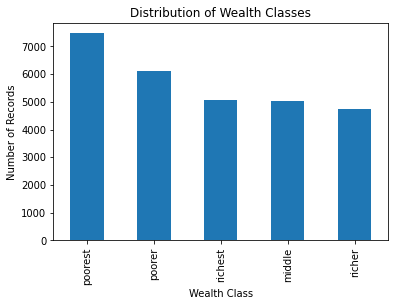

In [5]:
df.Wealth.value_counts().plot.bar(title = 'Distribution of Wealth Classes',
                                  xlabel = 'Wealth Class',
                                  ylabel = 'Number of Records')

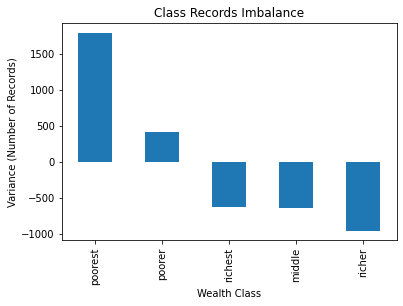

In [6]:
wealth_records = df.Wealth.value_counts()
wealth_records_unbalance = wealth_records - df.Wealth.value_counts().mean()
wealth_records_unbalance.plot.bar( title = 'Class Records Imbalance',
                                  xlabel = 'Wealth Class',
                                  ylabel = 'Variance (Number of Records)')

In [7]:
print('Number of Poorest class records: ', wealth_records[0])
print('Number of Richer class records: ', wealth_records[-1])
print('Poorest to Richer Ratio: ', round(wealth_records[0]/wealth_records[-1],3))

Number of Poorest class records:  7472
Number of Richer class records:  4724
Poorest to Richer Ratio:  1.582


Looks like data is highly unbalanced towards the poorest class.

Removing bias via random sampling

In [8]:
'''# undersampling poorest class
delta = wealth_records[0] - wealth_records[-1]
to_remove = np.random.choice(df[df['Wealth'] == 'poorest'].index, delta ,replace=False)
df.drop(to_remove, inplace = True)

# undersampling poorer class
delta = wealth_records[1] - wealth_records[-1]
to_remove = np.random.choice(df[df['Wealth'] == 'poorer'].index, delta ,replace=False)
df.drop(to_remove, inplace = True)

# undersampling richest class
delta = wealth_records[2] - wealth_records[-1]
to_remove = np.random.choice(df[df['Wealth'] == 'richest'].index, delta ,replace=False)
df.drop(to_remove, inplace = True)

# undersampling poorer class
delta = wealth_records[3] - wealth_records[-1]
to_remove = np.random.choice(df[df['Wealth'] == 'middle'].index, delta ,replace=False)
df.drop(to_remove, inplace = True)

df.Wealth.value_counts().plot.bar(title = 'Distribution of Wealth Classes (random undersampled)',
                                  xlabel = 'Wealth Class',
                                  ylabel = 'Number of Records')

'''

"# undersampling poorest class\ndelta = wealth_records[0] - wealth_records[-1]\nto_remove = np.random.choice(df[df['Wealth'] == 'poorest'].index, delta ,replace=False)\ndf.drop(to_remove, inplace = True)\n\n# undersampling poorer class\ndelta = wealth_records[1] - wealth_records[-1]\nto_remove = np.random.choice(df[df['Wealth'] == 'poorer'].index, delta ,replace=False)\ndf.drop(to_remove, inplace = True)\n\n# undersampling richest class\ndelta = wealth_records[2] - wealth_records[-1]\nto_remove = np.random.choice(df[df['Wealth'] == 'richest'].index, delta ,replace=False)\ndf.drop(to_remove, inplace = True)\n\n# undersampling poorer class\ndelta = wealth_records[3] - wealth_records[-1]\nto_remove = np.random.choice(df[df['Wealth'] == 'middle'].index, delta ,replace=False)\ndf.drop(to_remove, inplace = True)\n\ndf.Wealth.value_counts().plot.bar(title = 'Distribution of Wealth Classes (random undersampled)',\n                                  xlabel = 'Wealth Class',\n                    

## EDA

For proper visualization, understanding data types

In [9]:
df.dtypes

DHSCLUST                        int64
Wealth                         object
Wealth Index                  float64
Toilet Facility                object
Roof Material                  object
Electricity                    object
Cooking Fuel                   object
Drinking Water                 object
URBAN_RURA                     object
DHSREGNA                       object
ADM1NAME                       object
LATNUM                        float64
LONGNUM                       float64
geometry                       object
UN_Population_Density_2015    float64
Population_Density             object
dtype: object

#### Quantitative Analysis

In [10]:
df.describe()

,DHSCLUST,Wealth Index,LATNUM,LONGNUM,UN_Population_Density_2015
count,28385.000000,28385.000000,28385.000000,28385.000000,28385.000000
mean,204552.698679,885.282712,23.677259,81.388993,1235.154076
std,102722.430175,79344.783728,5.473717,6.342562,3664.137831
min,10001.000000,-179271.333333,6.968333,68.784352,0.000000
25%,130040.000000,-62347.950000,21.245899,76.579031,237.785146
50%,200548.000000,-7283.526316,24.785519,79.517600,471.385994
75%,300024.000000,62454.727273,27.114872,85.542028,954.873995
max,360482.000000,223809.000000,34.847342,97.050089,63807.058333


Questions:
1. Does Wealth Index has outliers? (Box and whiskers will tell).

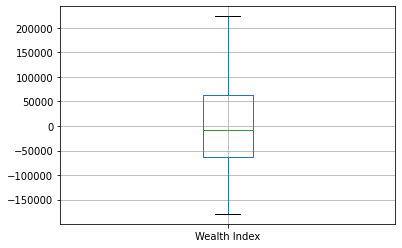

In [11]:
df.boxplot(column = ['Wealth Index'])

Looks okay. 

What about correlations?

In [12]:
df.corr()

,DHSCLUST,Wealth Index,LATNUM,LONGNUM,UN_Population_Density_2015
DHSCLUST,1.000000,0.089444,0.023887,-0.202747,0.077470
Wealth Index,0.089444,1.000000,-0.031839,-0.295426,0.234331
LATNUM,0.023887,-0.031839,1.000000,0.114382,-0.006323
LONGNUM,-0.202747,-0.295426,0.114382,1.000000,-0.076227
UN_Population_Density_2015,0.077470,0.234331,-0.006323,-0.076227,1.000000


*   Latitude and Longitude are irrelevant. 
*   Population density has a weak correlation with Wealth Index. Makes sense. 


#### Descriptive Analysis

In [13]:
df.describe(include = 'object')

,Wealth,Toilet Facility,Roof Material,Electricity,Cooking Fuel,Drinking Water,URBAN_RURA,DHSREGNA,ADM1NAME,geometry,Population_Density
count,28385,28385,28385,28385,28385,28385,28385,28385,28385,28385,28385
unique,5,4,11,2,7,12,2,634,36,28385,5
top,poorest,Flush,Cement,yes,Wood/Straw,Tube Well/Borehole,R,Meerut,Uttar Pradesh,POINT (84.6818742 23.43799311),Low
freq,7472,13904,11931,26297,15079,12064,19919,112,3637,1,5677


Observations:
*   No missing data

Questions:

*   Relation between Toilet Facilitty & Wealth
*   Relation between Roof Material & Wealth
*   Relation between Electricity & Wealth
*   Relation between Drinking Water & Wealth
*   Relation between Drinking Population Density & Wealth

The columns I think will not help:

*   ~Urban/Rural~
*   DHSREGNA	
*   ADM1NAME	
*   geometry
*   LATNUM
*   LONGNUM








In [14]:
df.drop(columns = ['DHSREGNA', 'ADM1NAME', 'LATNUM', 'LONGNUM', 'geometry'],
        inplace = True)
df.shape

(28385, 11)

In [15]:
df.columns

Index(['DHSCLUST', 'Wealth', 'Wealth Index', 'Toilet Facility',
       'Roof Material', 'Electricity', 'Cooking Fuel', 'Drinking Water',
       'URBAN_RURA', 'UN_Population_Density_2015', 'Population_Density'],
      dtype='object')

##### Without Rural/Urban Flag

Relation between Toilet Facilitty & Wealth

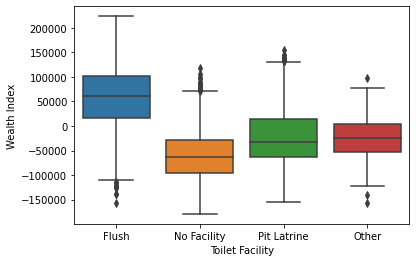

In [16]:
sns.boxplot(x="Toilet Facility", 
            y="Wealth Index", 
            data=df)

Relation between Roof Material & Wealth

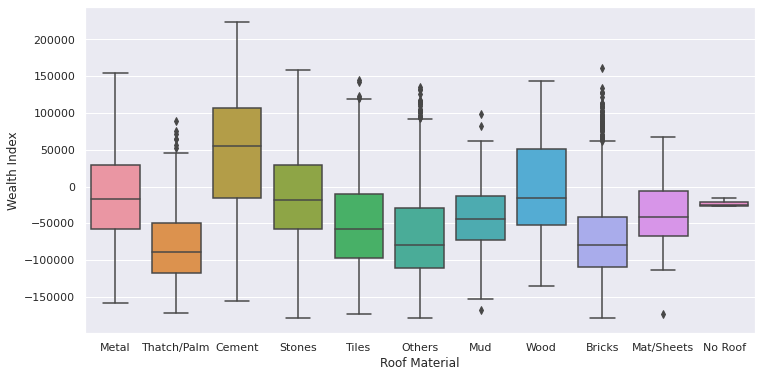

In [17]:
sns.set(rc={'figure.figsize':(12, 6)})

sns.boxplot(x="Roof Material", 
            y="Wealth Index",  
            data=df)

Relation between Electricity & Wealth

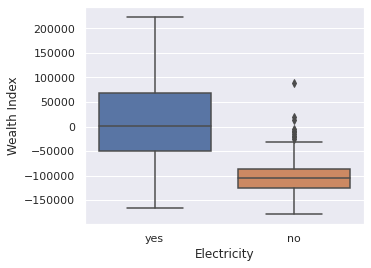

In [18]:
sns.set(rc={'figure.figsize':(5, 4)})

sns.boxplot(x="Electricity", 
            y="Wealth Index",  
            data=df)

Relation between Drinking Water & Wealth

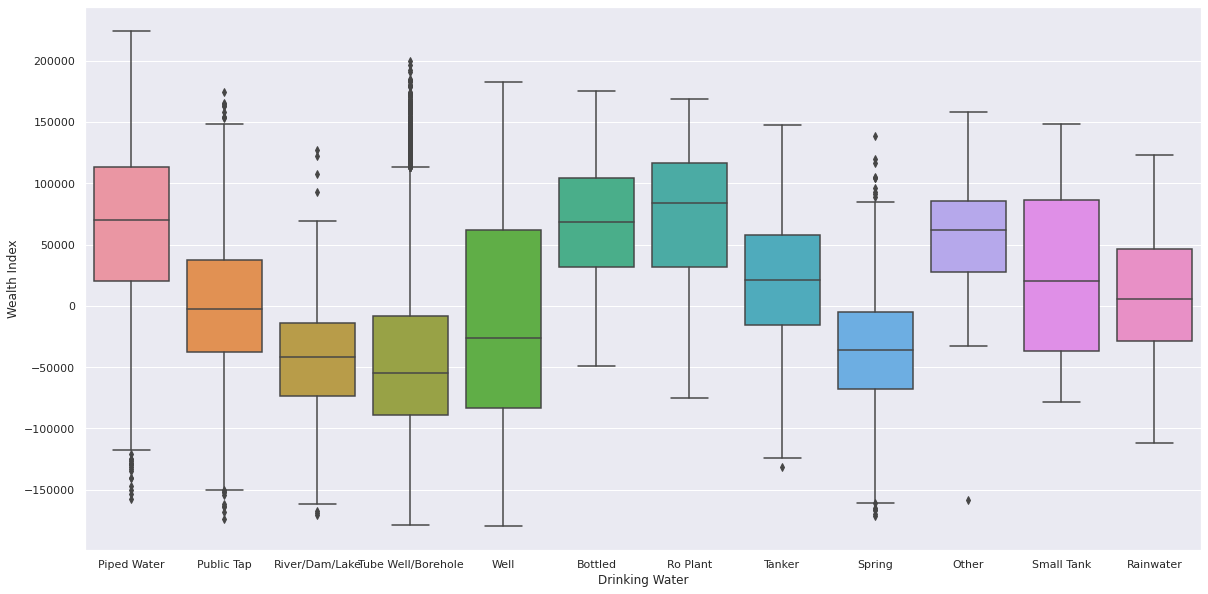

In [19]:
sns.set(rc={'figure.figsize':(20, 10)})

sns.boxplot(x="Drinking Water", 
            y="Wealth Index",  
            data=df)

I think differentiating between Rurual and Urban will help.

Relation between Drinking Population Density & Wealth

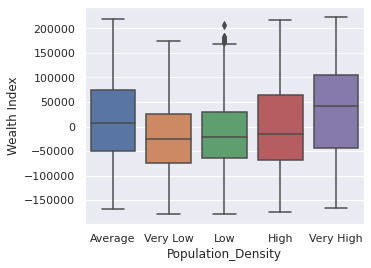

In [20]:
sns.set(rc={'figure.figsize':(5, 4)})

sns.boxplot(x="Population_Density", 
            y="Wealth Index",  
            data=df)

##### Grouped by Rural/Urban

Relation between Toilet Facilitty & Wealth

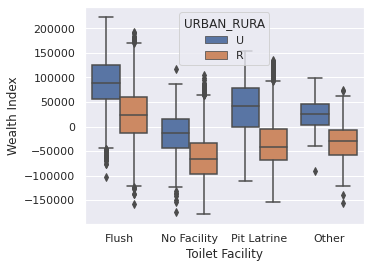

In [21]:
sns.boxplot(x="Toilet Facility", 
            y="Wealth Index",
            hue='URBAN_RURA', 
            data=df)

Relation between Roof Material & Wealth

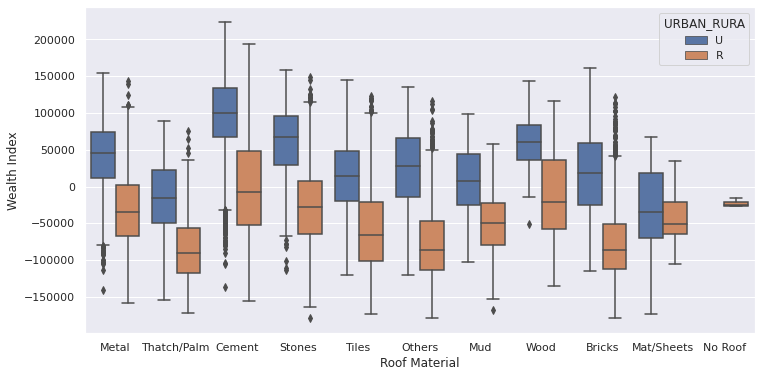

In [22]:
sns.set(rc={'figure.figsize':(12, 6)})

sns.boxplot(x="Roof Material", 
            y="Wealth Index",
            hue='URBAN_RURA',  
            data=df)

Relation between Electricity & Wealth

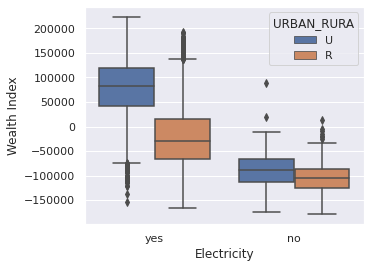

In [23]:
sns.set(rc={'figure.figsize':(5, 4)})

sns.boxplot(x="Electricity", 
            y="Wealth Index",
            hue='URBAN_RURA',  
            data=df)

Relation between Drinking Water & Wealth

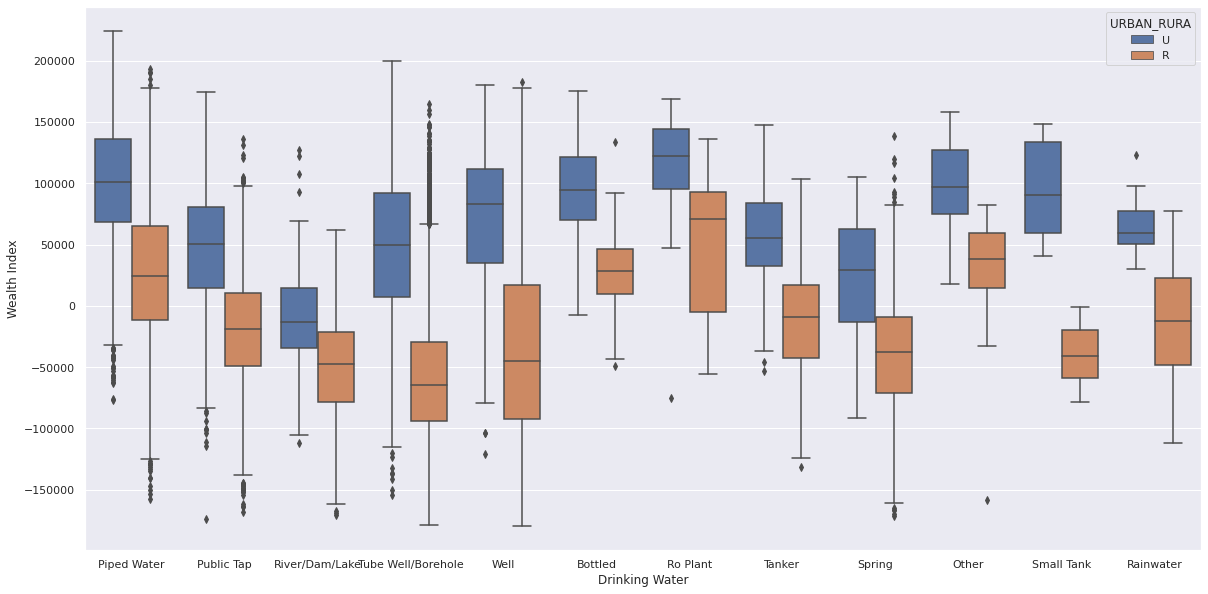

In [24]:
sns.set(rc={'figure.figsize':(20, 10)})

sns.boxplot(x="Drinking Water", 
            y="Wealth Index",
            hue='URBAN_RURA',  
            data=df)

Relation between Drinking Population Density & Wealth

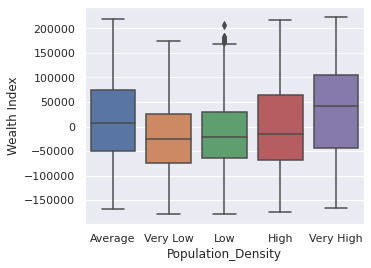

In [25]:
sns.set(rc={'figure.figsize':(5, 4)})

sns.boxplot(x="Population_Density", 
            y="Wealth Index",  
            data=df)

## Modelling & Evaluation


This is a classification problem. Classification algorithms that might work:



*   SVM
*   Logistic Regression
*   Decision Trees


### Preprocessing

In [26]:
df.columns

Index(['DHSCLUST', 'Wealth', 'Wealth Index', 'Toilet Facility',
       'Roof Material', 'Electricity', 'Cooking Fuel', 'Drinking Water',
       'URBAN_RURA', 'UN_Population_Density_2015', 'Population_Density'],
      dtype='object')

In [27]:
X = df[['Toilet Facility', 
       'Roof Material', 
       'Electricity', 
       'Cooking Fuel', 
       'Drinking Water', 
       'URBAN_RURA', 
       'Population_Density']].values
    
y = df['Wealth']

y[0:5]

0    richer
1    middle
2    middle
3    middle
4    middle
Name: Wealth, dtype: object

In [28]:
le_toilet_facility = preprocessing.LabelEncoder()
le_toilet_facility.fit(['Flush', 'No Facility', 'Pit Latrine', 'Other'])
X[:,0] = le_toilet_facility.transform(X[:,0]) 

le_roof_material = preprocessing.LabelEncoder()
le_roof_material.fit(['Metal', 'Cement', 'Stones', 'Thatch/Palm', 'Tiles', 'Others', 'Mud', 'Bricks', 'Mat/Sheets', 'Wood', 'No Roof'])
X[:,1] = le_roof_material.transform(X[:,1])

le_electricity = preprocessing.LabelEncoder()
le_electricity.fit(['yes', 'no'])
X[:,2] = le_electricity.transform(X[:,2]) 

le_cooking_fuel = preprocessing.LabelEncoder()
le_cooking_fuel.fit(['Petroleum', 'Wood/Straw', 'Electricity', 'Crops', 'Dung', 'Biogas', 'Coal'])
X[:,3] = le_cooking_fuel.transform(X[:,3])

le_drinking_water = preprocessing.LabelEncoder()
le_drinking_water.fit(['Piped Water', 'Public Tap', 'Tube Well/Borehole', 'Well', 'Bottled', 'River/Dam/Lake', 'Ro Plant', 'Tanker', 'Spring', 'Other', 'Small Tank', 'Rainwater'])
X[:,4] = le_drinking_water.transform(X[:,4])

le_urban_rural = preprocessing.LabelEncoder()
le_urban_rural.fit(['U', 'R'])
X[:,5] = le_urban_rural.transform(X[:,5])

le_population_density = preprocessing.LabelEncoder()
le_population_density.fit(['Average', 'Very Low', 'Low', 'High', 'Very High'])
X[:,6] = le_population_density.transform(X[:,6])

X[:5]

array([[0, 3, 1, 5, 2, 1, 0],
       [0, 3, 1, 5, 2, 0, 4],
       [0, 3, 1, 6, 2, 0, 4],
       [0, 3, 1, 6, 2, 0, 4],
       [0, 3, 1, 5, 2, 0, 4]], dtype=object)

In [29]:
y.unique()

array(['richer', 'middle', 'poorer', 'poorest', 'richest'], dtype=object)

In [30]:
le_wealth = preprocessing.LabelEncoder()
le_wealth.fit(['richer', 'middle', 'poorest', 'poorer', 'richest'])
y = le_wealth.transform(y)
y[:5]
#le_wealth

array([3, 0, 0, 0, 0])

In [31]:
# test-train split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
print('Shape of X_trainset :',X_trainset.shape,'\nShape of y_trainset :',y_trainset.shape)

Shape of X_trainset : (19869, 7) 
Shape of y_trainset : (19869,)


In [32]:
X_trainset

array([[1, 1, 1, ..., 10, 0, 0],
       [1, 7, 1, ..., 3, 0, 4],
       [0, 1, 1, ..., 2, 1, 1],
       ...,
       [1, 6, 0, ..., 11, 0, 2],
       [0, 3, 1, ..., 10, 0, 1],
       [0, 1, 1, ..., 2, 1, 1]], dtype=object)

In [33]:
# to measure performance
def evaluate_ai (y_testset, y_hat):
    print("AI's Accuracy: ", round(metrics.accuracy_score(y_testset, y_hat),2))
    print("AI's Jaccard Similarity Index: ", round(jaccard_score(y_testset, y_hat, average='weighted'),2))
    print("AI's F1 Score : ", round(f1_score(y_testset, y_hat, average='weighted'),2))
    #print("AI's Log Loss: ", round(log_loss(y_testset, y_hat),2))
    print("AI's MAE: ", round(mean_absolute_error(y_testset, y_hat),2))

### SVM

In [34]:
clf = svm.SVC(kernel='linear', gamma = 'auto')
clf.fit(X_trainset,y_trainset)
y_hat = clf.predict(X_testset)  
evaluate_ai(y_testset, y_hat)

AI's Accuracy:  0.49
AI's Jaccard Similarity Index:  0.31
AI's F1 Score :  0.44
AI's MAE:  0.9


In [35]:
mean_absolute_error(y_hat, y_testset)

0.9000704556129638

### Decision Tree

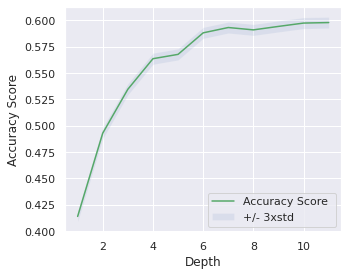

Depth With Max Accuracy : 10 
Max accuracy : 0.5979333020197276




In [36]:

Ks = 12
mean_acc= np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    k_hunter = DecisionTreeClassifier(criterion="entropy", max_depth = n).fit(X_trainset,y_trainset)
    y_hat2=k_hunter.predict(X_testset)
    mean_acc[n-1] = accuracy_score(y_testset, y_hat2)
    std_acc[n-1]=np.std(y_hat2==y_testset)/np.sqrt(y_hat2.shape[0])

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy Score ', '+/- 3xstd'))
plt.ylabel('Accuracy Score')
plt.xlabel('Depth')
plt.tight_layout()
plt.show()

Tree_optimizers = []
for i in range(0,len(mean_acc)):
    if mean_acc[i] == mean_acc.max():
        Tree_optimizers.append(i)
        print('Depth With Max Accuracy :',i,'\nMax accuracy :',mean_acc.max())

print('\n')
depth_optimized = Tree_optimizers[0]
Tree_optimized = DecisionTreeClassifier(criterion="entropy", max_depth = depth_optimized)
Tree_optimized.fit(X_trainset,y_trainset)
y_hat_optimized = Tree_optimized.predict(X_testset)

In [37]:
# Build the model
DTree = DecisionTreeClassifier(criterion="entropy", max_depth = 9)
DTree # it shows the default parameters

# Fit the model
DTree.fit(X_trainset,y_trainset)

# Make predictions
predTree = DTree.predict(X_testset)
evaluate_ai (y_testset, predTree)

AI's Accuracy:  0.59
AI's Jaccard Similarity Index:  0.43
AI's F1 Score :  0.58
AI's MAE:  0.65


### Classification via Neural Network